In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_importance
import graphviz 
import os
import pandas as pd
import time
import xgboost as xgb
import matplotlib.pyplot as plt

df =  pd.read_csv("C:/Users/student/Desktop/project/Judgement_Feature.csv")
df

,judge_court,judge_year,judge_month,judge_index,judge_title,教育程度,罪責,傷害方式,下手力道,攻擊部位,...,Recht_score,judge_crimePred,crimePredCategory,judge_crime,crimeCategory,judge_result,judge_resultInt,judge_class,judge_class2,judge_class3
0,臺灣彰化地方法院,111,1,4,過失傷害,1,1,0,0,0,...,0,無罪,0,汽車駕駛人無駕駛執照駕車過失傷害罪,1,拘役參拾伍日,35,2,1,1
1,臺灣彰化地方法院,111,1,6,傷害致重傷害,0,2,0,0,0,...,0,傷害致重傷害,7,傷害人致重傷罪,4,有期徒刑壹年捌月,605,4,1,3
2,臺灣彰化地方法院,111,1,18,重傷害,0,0,0,0,0,...,0,傷害致重傷害,7,傷害罪,3,有期徒刑陸月,180,3,1,2
3,臺灣彰化地方法院,111,1,19,傷害,0,0,0,0,0,...,1,無罪,0,無罪,0,零日,0,0,0,0
4,臺灣彰化地方法院,111,1,27,傷害,0,0,0,0,0,...,2,無罪,0,無罪,0,零日,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66178,臺灣南投地方法院,102,11,20,過失傷害,0,2,0,0,0,...,0,過失傷害致重傷,5,過失傷害人,1,拘役貳拾伍日,25,1,1,1
66179,臺灣南投地方法院,102,11,27,傷害,0,0,0,0,0,...,0,普通傷害罪,6,傷害罪,3,拘役叁拾日,30,1,1,1
66180,臺灣南投地方法院,102,12,3,業務過失傷害,1,0,0,0,0,...,0,過失傷害致重傷,5,業務上之過失傷害人,1,有期徒刑肆月,120,3,1,2
66181,臺灣南投地方法院,102,12,5,傷害等,0,0,0,0,0,...,0,普通傷害罪,6,傷害罪,3,拘役叁拾伍日,35,2,1,1


In [2]:
# 每個特徵的類別數量
print(f'df_教育程度:\n{df["教育程度"].value_counts()}\n')
print(f'df_罪責:\n{df["罪責"].value_counts()}\n')
print(f'df_傷害方式:\n{df["傷害方式"].value_counts()}\n')
print(f'df_下手力道:\n{df["下手力道"].value_counts()}\n')
print(f'df_攻擊部位:\n{df["攻擊部位"].value_counts()}\n')
print(f'df_傷害結果:\n{df["傷害結果"].value_counts()}\n')
print(f'df_犯後態度:\n{df["犯後態度"].value_counts()}\n')
print(f'df_坦承情況:\n{df["坦承情況"].value_counts()}\n')
print(f'df_賠償狀況:\n{df["賠償狀況"].value_counts()}\n')
print(f'df_經濟狀況:\n{df["經濟狀況"].value_counts()}\n')
print(f'df_被告身心狀況:\n{df["被告身心狀況"].value_counts()}\n')
print(f'df_被害身心狀況:\n{df["被害身心狀況"].value_counts()}\n')
print(f'df_和解狀況:\n{df["和解狀況"].value_counts()}\n')
print(f'df_告訴人和被告人之關係:\n{df["告訴人和被告人之關係"].value_counts()}\n')
print(f'df_法官心證:\n{df["法官心證"].value_counts()}\n')
print(f'df_crimePredCategory:\n{df["crimePredCategory"].value_counts()}\n')

df_教育程度:
0    56459
1     9724
Name: 教育程度, dtype: int64

df_罪責:
0    41998
2    13712
1    10473
Name: 罪責, dtype: int64

df_傷害方式:
0    65032
1     1151
Name: 傷害方式, dtype: int64

df_下手力道:
0    65939
1      244
Name: 下手力道, dtype: int64

df_攻擊部位:
0    66183
Name: 攻擊部位, dtype: int64

df_傷害結果:
0    55327
1     8896
2     1960
Name: 傷害結果, dtype: int64

df_犯後態度:
0    49842
1     8631
2     7710
Name: 犯後態度, dtype: int64

df_坦承情況:
0    57179
1     8972
2       32
Name: 坦承情況, dtype: int64

df_賠償狀況:
0    65995
1      187
2        1
Name: 賠償狀況, dtype: int64

df_經濟狀況:
0    66081
1      102
Name: 經濟狀況, dtype: int64

df_被告身心狀況:
0    64772
1     1411
Name: 被告身心狀況, dtype: int64

df_被害身心狀況:
0    65328
1      855
Name: 被害身心狀況, dtype: int64

df_和解狀況:
2    33389
0    29509
1     3285
Name: 和解狀況, dtype: int64

df_告訴人和被告人之關係:
0    64991
1     1192
Name: 告訴人和被告人之關係, dtype: int64

df_法官心證:
0    66174
1        9
Name: 法官心證, dtype: int64

df_crimePredCategory:
5     33440
6     15153
0     12532
10     4142
9   

In [2]:
X = df.loc[:,["教育程度", "罪責", "傷害方式", "下手力道", "傷害結果", "犯後態度", "坦承情況", "賠償狀況", "經濟狀況", "被告身心狀況", "被害身心狀況", "和解狀況", "告訴人和被告人之關係", "法官心證", "crimePredCategory"]]
X

,教育程度,罪責,傷害方式,下手力道,傷害結果,犯後態度,坦承情況,賠償狀況,經濟狀況,被告身心狀況,被害身心狀況,和解狀況,告訴人和被告人之關係,法官心證,crimePredCategory
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,1,0,0,0,0,0,2,0,0,7
2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,7
3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66178,0,2,0,0,0,1,0,0,0,0,0,2,0,0,5
66179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6
66180,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5
66181,0,0,0,0,0,1,0,0,0,0,0,2,0,0,6


In [3]:
y_CC = df.loc[:,"crimeCategory"]
y1 = df.loc[:,"judge_class"]  # 刑期分類7類
y2 = df.loc[:,"judge_class2"] # 有無判刑
y3 = df.loc[:,"judge_class3"] # 刑期分類6類

print(f'y_CC類別統計:\n{y_CC.value_counts()}')
print(f'y1類別統計:\n{y1.value_counts()}')
print(f'y2類別統計:\n{y2.value_counts()}')
print(f'y3類別統計:\n{y3.value_counts()}')

y_CC類別統計:
1     43965
3     15034
0      4169
2      2709
4       112
5        78
9        46
6        29
7        25
12        6
10        4
13        2
11        2
8         2
Name: crimeCategory, dtype: int64
y1類別統計:
2    28580
3    17603
1    14926
0     4170
4      700
5      120
6       84
Name: judge_class, dtype: int64
y2類別統計:
1    62013
0     4170
Name: judge_class2, dtype: int64
y3類別統計:
1    43506
2    17603
0     4170
3      700
4      120
5       84
Name: judge_class3, dtype: int64


In [4]:
X_train, X_test, y_CC_train, y_CC_test = train_test_split(X, y_CC, test_size=0.1, random_state=1 )
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.1)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.1)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.1)

## Decision Tree

In [5]:
# 罪名預測
DTC = DecisionTreeClassifier(max_depth=10, criterion='entropy')
DTC.fit(X_train, y_CC_train)

y_CC_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_CC_test, y_CC_pred)
num_correct_samples = accuracy_score(y_CC_test, y_CC_pred, normalize=False)
con_matrix = confusion_matrix(y_CC_test, y_CC_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))

# output tree structure 
# dot_data = tree.export_graphviz(DTC, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("DTC") 

number of correct sample: 4327
accuracy: 0.6537241275117087
con_matrix: 
[[   0  431    0    2    0    0    0    0]
 [   4 4319    2   26    0    0    0    0]
 [   0  280    0    1    0    0    0    0]
 [   4 1511    0    8    0    0    0    0]
 [   0   14    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]]


In [7]:
# class_weight = "balanced"
DTC = DecisionTreeClassifier(max_depth=10, criterion='entropy',class_weight = "balanced")
DTC.fit(X_train, y_CC_train)

y_CC_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_CC_test, y_CC_pred)
num_correct_samples = accuracy_score(y_CC_test, y_CC_pred, normalize=False)
con_matrix = confusion_matrix(y_CC_test, y_CC_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))

# output tree structure
# dot_data = tree.export_graphviz(DTC, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("DTC") 

number of correct sample: 367
accuracy: 0.05544644206073425
con_matrix: 
[[ 34  22  38  32  19  55  47  32  20  45  20  12  51   6]
 [346 169 363 378 242 550 479 312 199 422 196 241 407  47]
 [ 18  16  28  26  15  43  28  12  16  28  12  15  23   1]
 [134  63 132 133  75 211 150  99  67 144  61  76 152  26]
 [  0   1   1   2   0   2   1   0   1   1   0   2   3   0]
 [  0   1   1   0   0   2   0   0   0   3   0   0   0   0]
 [  0   0   2   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   2   0   0   1   1   0   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [8]:
# 刑期預測(7類)
DTC = DecisionTreeClassifier(max_depth=10, criterion='entropy')
DTC.fit(X_train, y1_train)

y1_pred = DTC.predict(X_test)

accuracy = accuracy_score(y1_test, y1_pred)
num_correct_samples = accuracy_score(y1_test, y1_pred, normalize=False)
con_matrix = confusion_matrix(y1_test, y1_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))


number of correct sample: 2783
accuracy: 0.42045626227526817
con_matrix: 
[[   1    6  417    4    0    0    0]
 [   3   24 1473   21    0    0    0]
 [   3   27 2732   34    0    0    0]
 [   0   20 1744   26    1    0    0]
 [   0    3   65    0    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]


In [9]:
DTC.feature_importances_

array([3.18577303e-02, 1.20832250e-01, 1.94694833e-02, 4.35885902e-03,
       2.00663513e-01, 4.92861765e-02, 1.04481385e-01, 2.81652830e-03,
       1.04273021e-03, 2.00586409e-02, 7.60307850e-03, 9.09292509e-02,
       9.25128420e-03, 6.84038339e-06, 3.37342250e-01])

In [10]:
# 有無判刑預測
DTC = DecisionTreeClassifier(max_depth=20)
DTC.fit(X_train, y2_train)

y2_pred = DTC.predict(X_test)

accuracy = accuracy_score(y2_test, y2_pred)
num_correct_samples = accuracy_score(y2_test, y2_pred, normalize=False)
con_matrix = confusion_matrix(y2_test, y2_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))


# # output tree structure
# dot_data = tree.export_graphviz(DTC, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("DTC") 

number of correct sample: 6199
accuracy: 0.9365463060885331
con_matrix: 
[[   0  405]
 [  15 6199]]


In [12]:
DTC = DecisionTreeClassifier(max_depth=20, class_weight = "balanced")
# DTC = DecisionTreeClassifier(max_depth=20)
DTC.fit(X_train, y2_train)

y2_pred = DTC.predict(X_test)

accuracy = accuracy_score(y2_test, y2_pred)
num_correct_samples = accuracy_score(y2_test, y2_pred, normalize=False)
con_matrix = confusion_matrix(y2_test, y2_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))


# # output tree structure
# dot_data = tree.export_graphviz(DTC, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("DTC") 

number of correct sample: 3276
accuracy: 0.4949388125094425
con_matrix: 
[[ 202  203]
 [3140 3074]]


In [11]:
DTC.feature_importances_

array([0.00236512, 0.15129593, 0.05879709, 0.00564941, 0.03885501,
       0.15825132, 0.09362476, 0.01031662, 0.0042678 , 0.03936679,
       0.02758505, 0.15799344, 0.03218172, 0.00035293, 0.21909701])

## RandomForestClassifier

In [6]:
# 罪名預測
T1=time.time()
RFC = RandomForestClassifier(max_depth=10, n_estimators=1000)
RFC.fit(X_train, y_CC_train)

y_pred_RFC = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y_CC_test, y_pred_RFC)
num_correct_samples_RFC = accuracy_score(y_CC_test, y_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y_CC_test, y_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print('accuracy_RFC: {}'.format(accuracy_RFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 4350
accuracy_RFC: 0.6571989726544796
con_matrix_RFC: 
[[   0  432    0    1    0    0    0    0]
 [   0 4349    0    2    0    0    0    0]
 [   0  281    0    0    0    0    0    0]
 [   0 1522    0    1    0    0    0    0]
 [   0   14    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]]
總花費時間 : 0.17 分鐘


In [14]:
T1=time.time()
RFC = RandomForestClassifier(max_depth=10, n_estimators=1000, class_weight = "balanced", n_jobs=-1)
RFC.fit(X_train, y_CC_train)

y_pred_RFC = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y_CC_test, y_pred_RFC)
num_correct_samples_RFC = accuracy_score(y_CC_test, y_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y_CC_test, y_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print('accuracy_RFC: {}'.format(accuracy_RFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 688
accuracy_RFC: 0.10394319383592687
con_matrix_RFC: 
[[ 33  58  34  22  26  50  41  20  20  41  21  11  50   6]
 [299 535 336 323 270 543 390 225 194 360 196 229 404  47]
 [ 14  37  25  15  19  43  26   9  16  25  13  15  23   1]
 [104 208 115  91  95 211 137  71  64 114  62  73 152  26]
 [  1   2   0   1   0   3   1   0   1   0   0   2   3   0]
 [  0   2   1   0   0   2   0   0   0   2   0   0   0   0]
 [  0   0   2   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   1   0   1   0   0   0   1   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
總花費時間 : 0.05 分鐘


In [7]:
# 刑期預測(7類)
T1=time.time()
RFC = RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1)
RFC.fit(X_train, y1_train)

y1_pred_RFC = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y1_test, y1_pred_RFC)
num_correct_samples_RFC = accuracy_score(y1_test, y1_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y1_test, y1_pred_RFC)
T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print('accuracy_RFC: {}'.format(accuracy_RFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 2797
accuracy_RFC: 0.4225713854056504
con_matrix_RFC: 
[[   0    0  427    1    0    0    0]
 [   2    2 1513    4    0    0    0]
 [   0    4 2786    6    0    0    0]
 [   0    2 1780    9    0    0    0]
 [   0    0   68    0    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]
總花費時間 : 0.05 分鐘


## BalancedRandomForestClassifier

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [18]:
BRFC = BalancedRandomForestClassifier(max_depth=10, n_estimators=1000)
BRFC.fit(X_train, y_CC_train)

y_pred_BRFC = BRFC.predict(X_test)

accuracy_BRFC = accuracy_score(y_CC_test, y_pred_BRFC)
num_correct_samples_BRFC = accuracy_score(y_CC_test, y_pred_BRFC, normalize=False)
con_matrix_BRFC = confusion_matrix(y_CC_test, y_pred_BRFC)

print('number of correct sample_RFC: {}'.format(num_correct_samples_BRFC))
print('accuracy_RFC: {}'.format(accuracy_BRFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_BRFC))

number of correct sample_RFC: 28
accuracy_RFC: 0.004230246260764466
con_matrix_RFC: 
[[  6   1   0   8   6   7  41   3  54  16  81  90  75  45]
 [ 42   1   0  63  37 135 445  48 673 178 714 983 674 358]
 [  1   0   0   2   2   7  29   2  42  13  50  70  45  18]
 [ 16   0   0  17  12  49 155  15 231  70 270 323 245 120]
 [  0   0   0   0   1   2   2   0   1   0   1   2   4   1]
 [  0   0   0   1   0   1   0   0   0   1   2   2   0   0]
 [  0   0   0   0   0   0   1   0   1   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   1   1   3   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [19]:
BRFC = BalancedRandomForestClassifier(max_depth=10, n_estimators=1000)
BRFC.fit(X_train, y3_train)

y_pred_BRFC = BRFC.predict(X_test)

accuracy_BRFC = accuracy_score(y3_test, y_pred_BRFC)
num_correct_samples_BRFC = accuracy_score(y3_test, y_pred_BRFC, normalize=False)
con_matrix_BRFC = confusion_matrix(y3_test, y_pred_BRFC)

print('number of correct sample_RFC: {}'.format(num_correct_samples_BRFC))
print('accuracy_RFC: {}'.format(accuracy_BRFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_BRFC))

number of correct sample_RFC: 1281
accuracy_RFC: 0.19353376642997433
con_matrix_RFC: 
[[270  42   2  10  11   5  16  26  18]
 [ 77 300  17 137  24  29  33  38  22]
 [ 96 250  25 198  34  39  71  64  31]
 [ 75 228  17 195  23  46 110  73  44]
 [ 92 250  29 216  47  59 140  98  44]
 [ 83 262  34 247  53  58 136 146  81]
 [ 60 175  18 182  36  50 163 182  88]
 [ 33  73   2  69  17  20  88  76  64]
 [ 29  76   2  56  14  21  48  59 147]]


## XGBClassifier

In [20]:
T1=time.time()
XGBC = XGBClassifier( n_estimators=1000, learning_rate= 0.01, max_depth=6, class_weight = "balanced")        

XGBC.fit(X_train, y_CC_train)

y_CC_pred_XGBC = XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y_CC_test, y_CC_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y_CC_test, y_CC_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y_CC_test, y_CC_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print('accuracy_XGBC: {}'.format(accuracy_XGBC))
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

[11:07:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

number of correct sample_XGBC: 4347
accuracy_XGBC: 0.6567457319836834
con_matrix_XGBC: 
[[   0  433    0    0    0    0    0    0]
 [   0 4344    0    7    0    0    0    0]
 [   0  281    0    0    0    0    0    0]
 [   0 1520    0    3    0    0    0    0]
 [   0   14    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]]
總花費時間 : 0.93 分鐘


In [10]:
T1=time.time()
XGBC = XGBClassifier( n_estimators=1000, learning_rate= 0.01, max_depth=6)        

XGBC.fit(X_train, y1_train)

y1_pred_XGBC = XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y1_test, y1_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y1_test, y1_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y1_test, y1_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print('accuracy_XGBC: {}'.format(accuracy_XGBC))
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 2782
accuracy_XGBC: 0.42030518205166945
con_matrix_XGBC: 
[[   0    0  424    4    0    0    0]
 [   2    3 1509    7    0    0    0]
 [   0    8 2770   18    0    0    0]
 [   0    4 1778    9    0    0    0]
 [   0    0   67    1    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]
總花費時間 : 0.47 分鐘


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35657 (\N{CJK UNIFIED IDEOGRAPH-8B49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

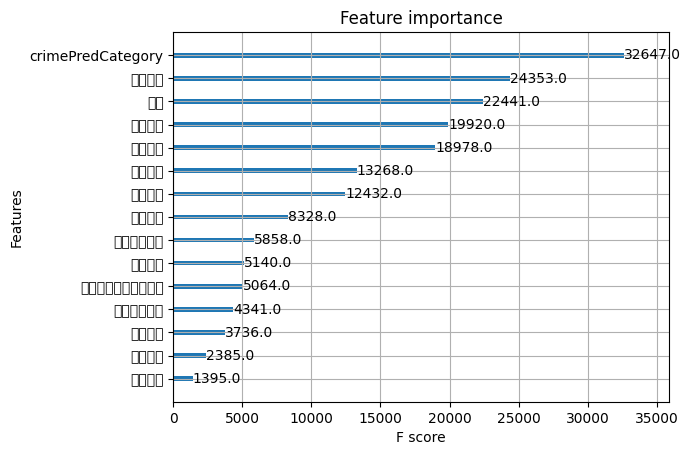

In [21]:
plot_importance(XGBC)
plt.show()

In [22]:
print(XGBC.feature_importances_)

[0.0769813  0.07556416 0.07927752 0.06989232 0.06969442 0.06882934
 0.07578474 0.0610481  0.07562754 0.08476245 0.06748039 0.05612041
 0.05303186 0.01512004 0.07078537]


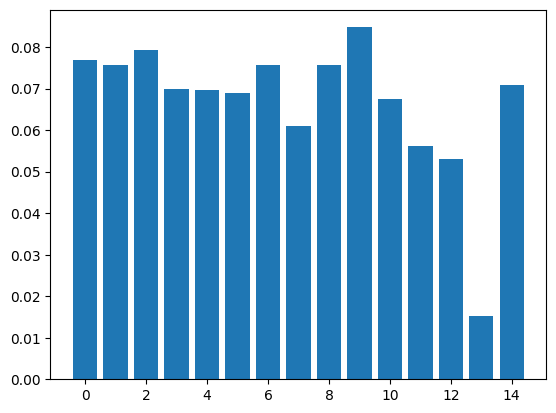

In [23]:
plt.bar(range(len(XGBC.feature_importances_)),XGBC.feature_importances_)
plt.show()

In [24]:
T1=time.time()
XGBC = XGBClassifier( n_estimators=1000, learning_rate= 0.01, max_depth=6)        

XGBC.fit(X_train, y2_train)

y2_pred_XGBC = XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y2_test, y2_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y2_test, y2_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y2_test, y2_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print('accuracy_XGBC: {}'.format(accuracy_XGBC))
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 6214
accuracy_XGBC: 0.9388125094425139
con_matrix_XGBC: 
[[   0  405]
 [   0 6214]]
總花費時間 : 0.10 分鐘


In [25]:
# 計算資料類別比例
from collections import Counter
counter = Counter(y2_train)
estimate = counter[0] / counter[1]
estimate

0.06747432749690854

In [26]:
# scale_pos_weight=0.0675 設資料權重
T1=time.time()
XGBC = XGBClassifier( n_estimators=1000, learning_rate= 0.01, max_depth=6, scale_pos_weight=0.0675)        

XGBC.fit(X_train, y2_train)

y2_pred_XGBC = XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y2_test, y2_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y2_test, y2_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y2_test, y2_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print('accuracy_XGBC: {}'.format(accuracy_XGBC))
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 3401
accuracy_XGBC: 0.5138238404592839
con_matrix_XGBC: 
[[ 198  207]
 [3011 3203]]
總花費時間 : 0.12 分鐘


## AdaBoostClassifier

In [27]:
ADBC = AdaBoostClassifier(n_estimators=1000, random_state=0) #沒有指定模型,預設是決策樹
ADBC.fit(X_train, y_CC_train)

AdaBoostClassifier(n_estimators=1000, random_state=0)

In [28]:
y_CC_pred_ADBC = ADBC.predict(X_test)
accuracy_ADBC = accuracy_score(y_CC_test, y_CC_pred_ADBC)
num_correct_samples_ADBC = accuracy_score(y_CC_test, y_CC_pred_ADBC, normalize=False)
con_matrix_ADBC = confusion_matrix(y_CC_test, y_CC_pred_ADBC)

print('number of correct sample_ADBC: {}'.format(num_correct_samples_ADBC))
print('accuracy_ADBC: {}'.format(accuracy_ADBC))
print('con_matrix_ADBC: \n{}'.format(con_matrix_ADBC))

number of correct sample_ADBC: 4243
accuracy_ADBC: 0.6410333887294153
con_matrix_ADBC: 
[[   0  425    0    0    0    0    0    0    8]
 [   0 4243    0    0    0    0    0    0  108]
 [   0  272    0    0    0    0    0    0    9]
 [   0 1489    0    0    0    0    0    0   34]
 [   0   14    0    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]]


In [11]:
ADBC = AdaBoostClassifier(n_estimators=1000, random_state=0)
ADBC.fit(X_train, y1_train)
y1_pred_ADBC = ADBC.predict(X_test)
accuracy_ADBC = accuracy_score(y1_test, y1_pred_ADBC)
num_correct_samples_ADBC = accuracy_score(y1_test, y1_pred_ADBC, normalize=False)
con_matrix_ADBC = confusion_matrix(y1_test, y1_pred_ADBC)

print('number of correct sample_ADBC: {}'.format(num_correct_samples_ADBC))
print('accuracy_ADBC: {}'.format(accuracy_ADBC))
print('con_matrix_ADBC: \n{}'.format(con_matrix_ADBC))

number of correct sample_ADBC: 2792
accuracy_ADBC: 0.42181598428765676
con_matrix_ADBC: 
[[   0    0  427    1    0    0    0]
 [   0    0 1519    2    0    0    0]
 [   0    0 2791    5    0    0    0]
 [   0    0 1790    1    0    0    0]
 [   0    0   68    0    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]


## SVC

In [12]:
T1=time.time()

svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, y_CC_train)

y_CC_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_CC_test, y_CC_pred_svc)
num_correct_samples_svc = accuracy_score(y_CC_test, y_CC_pred_svc, normalize=False)
con_matrix_svc = confusion_matrix(y_CC_test, y_CC_pred_svc)

T2=time.time()

print('number of correct sample: {}'.format(num_correct_samples_svc))
print('accuracy: {}'.format(accuracy_svc))
print('con_matrix: \n{}'.format(con_matrix_svc))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample: 4351
accuracy: 0.6573500528780782
con_matrix: 
[[   0  433    0    0    0    0    0    0]
 [   0 4351    0    0    0    0    0    0]
 [   0  281    0    0    0    0    0    0]
 [   0 1523    0    0    0    0    0    0]
 [   0   14    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]]
總花費時間 : 1.52 分鐘


In [13]:
T1=time.time()

svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, y1_train)

y1_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y1_test, y1_pred_svc)
num_correct_samples_svc = accuracy_score(y1_test, y1_pred_svc, normalize=False)
con_matrix_svc = confusion_matrix(y1_test, y1_pred_svc)

T2=time.time()

print('number of correct sample: {}'.format(num_correct_samples_svc))
print('accuracy: {}'.format(accuracy_svc))
print('con_matrix: \n{}'.format(con_matrix_svc))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample: 2796
accuracy: 0.42242030518205165
con_matrix: 
[[   0    0  428    0    0    0    0]
 [   0    0 1521    0    0    0    0]
 [   0    0 2796    0    0    0    0]
 [   0    0 1791    0    0    0    0]
 [   0    0   68    0    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]
總花費時間 : 2.57 分鐘


In [30]:
T1=time.time()

svc = SVC(kernel='rbf', C=1.0, class_weight = "balanced")
svc.fit(X_train, y_CC_train)

y_CC_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_CC_test, y_CC_pred_svc)
num_correct_samples_svc = accuracy_score(y_CC_test, y_CC_pred_svc, normalize=False)
con_matrix_svc = confusion_matrix(y_CC_test, y_CC_pred_svc)

T2=time.time()

print('number of correct sample: {}'.format(num_correct_samples_svc))
print('accuracy: {}'.format(accuracy_svc))
print('con_matrix: \n{}'.format(con_matrix_svc))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample: 405
accuracy: 0.06118749055748603
con_matrix: 
[[  8  40  42   2  28  24  66  55  27  40  21  16  54  10]
 [ 88 358 328  41 356 329 712 563 249 354 197 246 446  84]
 [  4  25  17   4  25  22  47  32  19  28  13  18  24   3]
 [ 37 126 128  17 112 118 230 207  84 117  61  84 168  34]
 [  0   0   0   0   2   2   2   1   1   0   0   2   3   1]
 [  0   1   1   0   1   1   0   1   0   2   0   0   0   0]
 [  0   0   0   0   0   0   1   1   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   3   0   0   0   1   0   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
總花費時間 : 10.45 分鐘


In [31]:
svc.class_weight_

array([1.13880392e+00, 1.07400702e-01, 1.75229466e+00, 3.14896857e-01,
       4.34139942e+01, 5.99235412e+01, 1.63637363e+02, 1.70182857e+02,
       2.12728571e+03, 1.09091575e+02, 1.06364286e+03, 2.12728571e+03,
       7.09095238e+02, 2.12728571e+03])

### MLP

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [17]:
mlp.fit(X_train, y_CC_train)

Iteration 1, loss = 0.98032438
Iteration 2, loss = 0.94741205
Iteration 3, loss = 0.94758712
Iteration 4, loss = 0.94701994
Iteration 5, loss = 0.94676349
Iteration 6, loss = 0.94650832
Iteration 7, loss = 0.94659297
Iteration 8, loss = 0.94659037
Iteration 9, loss = 0.94604267
Iteration 10, loss = 0.94586348


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50, 10), learning_rate_init=0.1,
              max_iter=10, random_state=1, solver='sgd', verbose=10)

In [18]:
y_CC_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_CC_test, y_CC_pred_mlp)
num_correct_samples_mlp = accuracy_score(y_CC_test, y_CC_pred_mlp, normalize=False)
con_matrix_mlp = confusion_matrix(y_CC_test, y_CC_pred_mlp)

print('number of correct sample_MLP: {}'.format(num_correct_samples_mlp))
print(f'accuracy_MLP: {(accuracy_mlp)*100:.2f}%')
print('con_matrix_MLP: \n{}'.format(con_matrix_mlp))

number of correct sample_MLP: 4351
accuracy_XGBC: 65.74%
con_matrix_XGBC: 
[[   0  433    0    0    0    0    0    0]
 [   0 4351    0    0    0    0    0    0]
 [   0  281    0    0    0    0    0    0]
 [   0 1523    0    0    0    0    0    0]
 [   0   14    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0]]


In [19]:
mlp.fit(X_train, y1_train)
y1_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y1_test, y1_pred_mlp)
num_correct_samples_mlp = accuracy_score(y1_test, y1_pred_mlp, normalize=False)
con_matrix_mlp = confusion_matrix(y1_test, y1_pred_mlp)

print('number of correct sample_MLP: {}'.format(num_correct_samples_mlp))
print(f'accuracy_MLP: {(accuracy_mlp)*100:.2f}%')
print('con_matrix_MLP: \n{}'.format(con_matrix_mlp))

Iteration 1, loss = 1.30407096
Iteration 2, loss = 1.29543990
Iteration 3, loss = 1.29445591
Iteration 4, loss = 1.29472785
Iteration 5, loss = 1.29431371
Iteration 6, loss = 1.29416487
Iteration 7, loss = 1.29416782
Iteration 8, loss = 1.29419503
Iteration 9, loss = 1.29406752
Iteration 10, loss = 1.29405591
number of correct sample_MLP: 2796
accuracy_MLP: 42.24%
con_matrix_MLP: 
[[   0    0  428    0    0    0    0]
 [   0    0 1521    0    0    0    0]
 [   0    0 2796    0    0    0    0]
 [   0    0 1791    0    0    0    0]
 [   0    0   68    0    0    0    0]
 [   0    0   10    0    0    0    0]
 [   0    0    5    0    0    0    0]]


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## RandomForestRegressor

In [33]:
y_r = df.loc[:, "judge_resultInt"]
y_r

0         35
1        605
2        180
3          0
4          0
        ... 
66178     25
66179     30
66180    120
66181     35
66182     90
Name: judge_resultInt, Length: 66183, dtype: int64

In [34]:
from sklearn.metrics import mean_squared_error
X_train, X_test, y_r_train, y_r_test = train_test_split(X, y_r, test_size=0.1)

model = RandomForestRegressor(max_depth=6, n_estimators=1000, n_jobs=-1) 
model.fit(X_train, y_r_train)

y_r_pred = model.predict(X_test)
MSE=mean_squared_error(y_r_test, y_r_pred)

# Explained variance score: 1 is perfect prediction
print(f'MSE score: {MSE}')
print('R2 score: {}'.format(model.score(X_test, y_r_test, sample_weight=None))) 

MSE score: 8597.996923550261
R2 score: 0.41700751934227054


## XGBRegressor

In [35]:
regressor = xgb.XGBRegressor(
    n_estimators=1000,  # n_estimators: 總共迭代的次數，即決策樹的個數。預設值為100。
    reg_lambda=1,      
    gamma=0,           # gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。
    max_depth=6        # max_depth: 樹的最大深度，默認值為6。
)        

In [36]:
regressor.fit(X_train, y_r_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
y_r_pred = regressor.predict(X_test)
mse = mean_squared_error(y_r_test, y_r_pred)
r2 = r2_score(y_r_test, y_r_pred)
print('r2: {}'.format(r2))
print('mse: {}'.format(mse))

r2: 0.01757796126258393
mse: 14488.80036525097
